In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.experience import ExperienceSorceDiscountedSteps
from src.ddpg import DDPGActor, DDPGCritic, DDPGPolicy, DDPGAgent

GAMMA = 0.99
LEARNING_RATE = 0.0001
ENTROPY_BETA = 0.01
N_STEPS = 1
BATCH_SIZE = 64

CHECKPOINT_PATH = os.path.join("models", "05_pendulum_ac.tar")


# env = gym.make("Pendulum-v0")
# test_env = gym.make("Pendulum-v0")
env = gym.make("MountainCarContinuous-v0")
test_env = gym.make("MountainCarContinuous-v0")
device = torch.device("cpu")
act_net = DDPGActor(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)
crt_net = DDPGCritic(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = DDPGAgent(
    env=env,
    test_env=test_env,
    act_net=act_net,
    crt_net=crt_net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [17]:
agent.exp_train_source.render = False
agent.learn(10000, verbose_every=1000)
# agent.plot_performance()

 10%|█         | 1018/10000 [00:06<00:51, 173.27it/s]
 51000: loss=-0.008026,  mean reward=-33.46,  steps/ep=999,  episodes=51
 20%|██        | 2025/10000 [00:12<00:45, 175.87it/s]
 52000: loss=-0.017281,  mean reward=-33.45,  steps/ep=999,  episodes=52
 30%|███       | 3026/10000 [00:17<00:39, 174.44it/s]
 53000: loss=-0.028387,  mean reward=-33.44,  steps/ep=999,  episodes=53
 40%|████      | 4028/10000 [00:23<00:36, 163.76it/s]
 54000: loss=-0.037090,  mean reward=-33.46,  steps/ep=999,  episodes=54
 50%|█████     | 5030/10000 [00:29<00:28, 174.42it/s]
 55000: loss=-0.044746,  mean reward=-33.44,  steps/ep=999,  episodes=55
 60%|██████    | 6022/10000 [00:35<00:22, 176.98it/s]
 56000: loss=-0.049595,  mean reward=-33.43,  steps/ep=999,  episodes=56
 70%|███████   | 7026/10000 [00:40<00:16, 175.23it/s]
 57000: loss=-0.052443,  mean reward=-33.41,  steps/ep=999,  episodes=57
 80%|████████  | 8013/10000 [00:46<00:11, 166.86it/s]
 58000: loss=-0.054999,  mean reward=-33.41,  steps/ep=99

In [11]:
agent.epsilon_tracker.value

0.01

In [19]:
agent.exp_train_source.render = True
agent.exp_train_source.play_episode()
env.close()

In [18]:
agent.exp_test_source.render = True
agent.exp_test_source.play_episode()
test_env.close()

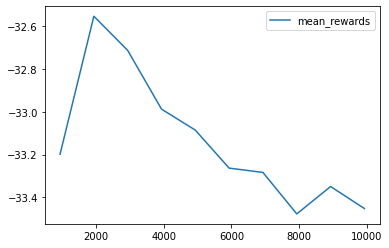

In [6]:
agent.plot_performance(['mean_rewards'])

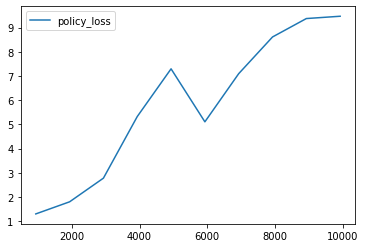

In [7]:
agent.plot_performance(['policy_loss'])

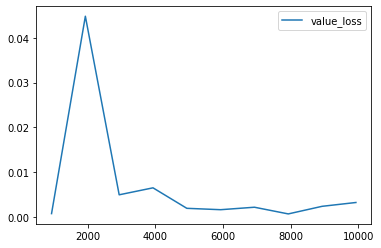

In [8]:
agent.plot_performance(['value_loss'])


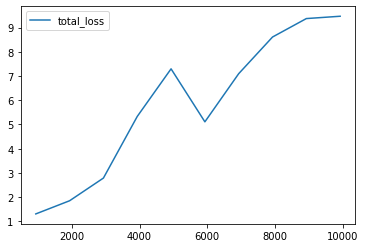

In [9]:
agent.plot_performance(['total_loss'])
